In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CaseStudy_FraudIdentification.csv")

In [3]:
data.head()

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,university,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,university,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,university,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   Gender                      30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [5]:
#Insights:
#1. There are no null values available.
#2. Gender, Education and Marriage needs attention for converting it to the int or float

# Performing EDA

In [6]:
# find the unique values in each categorical column
data.apply(lambda x: len(x.unique()) if x.dtype == 'object' else None)




LIMIT_BAL                     NaN
Gender                        2.0
EDUCATION                     7.0
MARRIAGE                      4.0
AGE                           NaN
PAY_0                         NaN
PAY_2                         NaN
PAY_3                         NaN
PAY_4                         NaN
PAY_5                         NaN
PAY_6                         NaN
BILL_AMT1                     NaN
BILL_AMT2                     NaN
BILL_AMT3                     NaN
BILL_AMT4                     NaN
BILL_AMT5                     NaN
BILL_AMT6                     NaN
PAY_AMT1                      NaN
PAY_AMT2                      NaN
PAY_AMT3                      NaN
PAY_AMT4                      NaN
PAY_AMT5                      NaN
PAY_AMT6                      NaN
default payment next month    NaN
dtype: float64

In [7]:
data["Gender"].value_counts()

Female    18112
Male      11888
Name: Gender, dtype: int64

In [8]:
data["EDUCATION"].value_counts()

university         14030
graduate school    10585
high school         4917
Graduate_Int         280
PG_Int               123
NoEdu                 51
PG                    14
Name: EDUCATION, dtype: int64

In [9]:
data["MARRIAGE"].value_counts()

single     15964
Married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64

In [10]:
#Insight

# In Marriage we can see a 0 which can not be defined

In [11]:
data.groupby("Gender").mean()*100

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
Gender,,,,,,,,,,,,,,,,,,,,,
Female,1.700865e+07,3480.686837,-6.918065,-20.240724,-23.028931,-27.766122,-31.675133,-33.210027,4.921640e+06,4.738100e+06,...,4.212260e+06,3.947382e+06,3.806443e+06,566032.707597,589520.008834,510305.725486,479778.699205,477875.204284,517566.530477,20.776281
Male,1.635198e+07,3651.943136,6.325707,-2.918910,-6.855653,-13.383244,-18.918237,-22.863392,5.428100e+06,5.191854e+06,...,4.500033e+06,4.158750e+06,4.010178e+06,566853.726447,596072.013795,541250.605653,486917.799462,483082.705249,527619.675303,24.167227


In [12]:
sex_target = pd.crosstab(data["default payment next month"], data["Gender"]).apply(lambda r: r/r.sum()*100).rename(columns = {1: "Male", 2: "Female"}, index = {0: "non defaults", 1: "defaults"})
print(sex_target)

Gender                         Female       Male
default payment next month                      
non defaults                79.223719  75.832773
defaults                    20.776281  24.167227


In [13]:
# Group by 'Gender' and 'default payment next month' and calculate the percentage
grouped_data = data.groupby(['default payment next month', 'Gender']).size().unstack('Gender')
grouped_data_percentage = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)
grouped_data_percentage.index = ['not defaults', 'defaults']
grouped_data_percentage.columns = ['Male', 'Female']

print(grouped_data_percentage)

                   Male     Female
not defaults  61.414997  38.585003
defaults      56.705847  43.294153


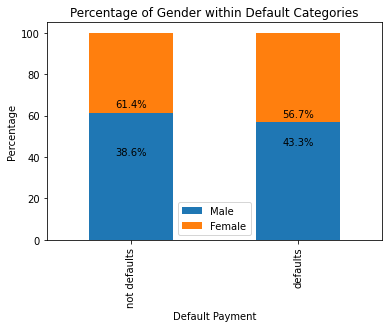

In [14]:
# Create a bar plot
ax = grouped_data_percentage.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.title('Percentage of Gender within Default Categories')

# Add annotations to the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Display the plot
plt.show()

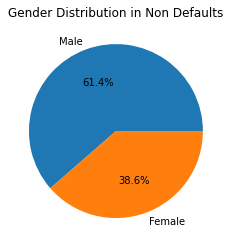

In [15]:
# Create a pie chart
plt.pie(grouped_data_percentage.loc['not defaults'], labels=grouped_data_percentage.columns, autopct='%1.1f%%')

# Set plot title
plt.title('Gender Distribution in Non Defaults')

# Display the pie chart
plt.show()

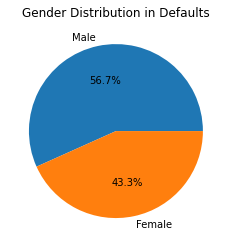

In [17]:
# Create a pie chart
plt.pie(grouped_data_percentage.loc['defaults'], labels=grouped_data_percentage.columns, autopct='%1.1f%%')

# Set plot title
plt.title('Gender Distribution in Defaults')
2
# Display the pie chart
plt.show()

In [18]:
#here it looks that pg int and pg are same level of education
# similiarly Graduate school and Graduate_Int looks same

In [19]:
data.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4917
Graduate_Int         280
PG_Int               123
NoEdu                 51
PG                    14
Name: EDUCATION, dtype: int64

# Merging Features

In [20]:
#Changing the PG values to PG_int, Graduate_Int to graduate school and "no edu" to high school (considering them less educated)

In [21]:
data["EDUCATION"] = data["EDUCATION"].replace("PG", "PG_Int")

In [22]:
data["EDUCATION"] = data["EDUCATION"].replace("Graduate_Int", "graduate school")

In [23]:
data["EDUCATION"] = data["EDUCATION"].replace("NoEdu", "high school")

In [24]:
data.EDUCATION.value_counts()

university         14030
graduate school    10865
high school         4968
PG_Int               137
Name: EDUCATION, dtype: int64

In [25]:
# Group by 'Education' and 'default payment next month' and calculate the percentage
grouped_data_education = data.groupby(['default payment next month', 'EDUCATION']).size().unstack('EDUCATION')
grouped_data_percentage_education = grouped_data_education.apply(lambda x: x / x.sum() * 100, axis=1)
grouped_data_percentage_education.index = ['not defaults', 'defaults']
grouped_data_percentage_education.columns = ['university', 'graduate school',"high school","PG_Int"]

print(grouped_data_percentage_education)

              university  graduate school  high school     PG_Int
not defaults    0.556412        37.711864    15.934771  45.796953
defaults        0.105485        30.952381    18.761302  50.180832


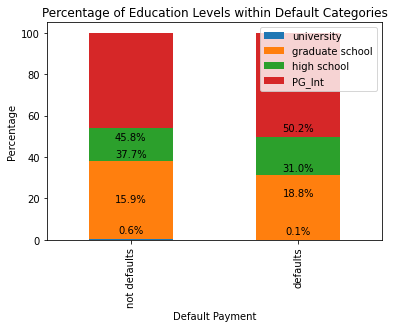

In [26]:
# Create a bar chart
ax = grouped_data_percentage_education.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.title('Percentage of Education Levels within Default Categories')

# Add annotations to the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Display the plot
plt.show()

In [27]:
#PG educated have more chances of Defaults

In [28]:
data.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [29]:
data.MARRIAGE.value_counts()

single     15964
Married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64

In [30]:
#Considering 0 and others in same category may be divorced or Widowed

data["MARRIAGE"] = data["MARRIAGE"].replace("0", "others")

In [31]:
data.MARRIAGE.value_counts()

single     15964
Married    13659
others       377
Name: MARRIAGE, dtype: int64

In [32]:
# Group by 'Married stats' and 'default payment next month' and calculate the percentage
grouped_data_Married = data.groupby(['default payment next month', 'MARRIAGE']).size().unstack('MARRIAGE')
grouped_data_percentage_Married = grouped_data_Married.apply(lambda x: x / x.sum() * 100, axis=1)
grouped_data_percentage_Married.index = ['not defaults', 'defaults']
grouped_data_percentage_Married.columns = ['single', 'Married',"others"]

print(grouped_data_percentage_Married)

                 single   Married     others
not defaults  44.739771  1.232666  54.027564
defaults      48.312236  1.341169  50.346594


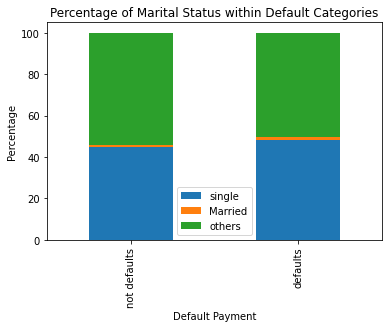

In [33]:
# Create a bar chart
ax = grouped_data_percentage_Married.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.title('Percentage of Marital Status within Default Categories')


# Display the plot
plt.show()

In [34]:
#Married people are less likely to default here

In [35]:
data.describe(exclude = "object")

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [392]:
data.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Feature Selection

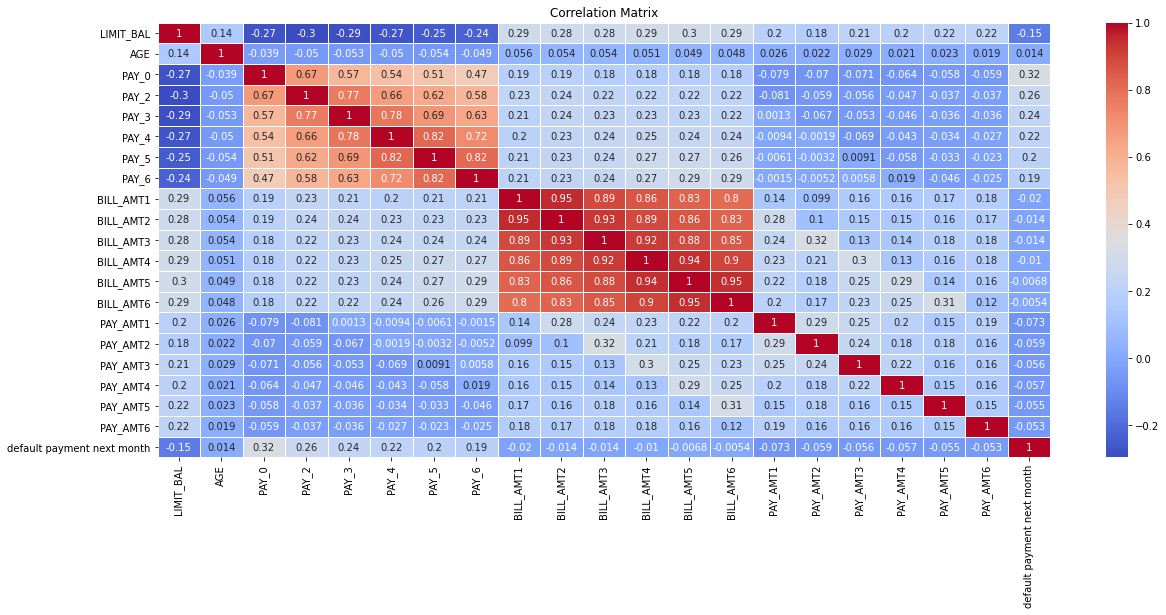

In [37]:
# Compute the correlation matrix
corr_matrix = data.drop(columns=["Gender", "EDUCATION", "MARRIAGE"]).corr()

# Create a heatmap with annotations
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figsize to adjust the size

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# Set plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [38]:
#here we conclude that the bill amounts are highly corelated to each other so keeping the latest one and dropping the remaining
# pay4 is highly corelated to pay5, pay6 so dropping pay 4 and pay 5

In [39]:
data_new = data.drop(columns = ["PAY_4","PAY_5","BILL_AMT1","BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5"])

In [40]:
data_new.describe(exclude = "object")

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.291100,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.149988,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [393]:
data_new.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')

# Remove Outliers

In [312]:
from scipy import stats

data_int = (np.abs(stats.zscore(data_new.drop(columns = ["Gender", "EDUCATION", "MARRIAGE"]))) < 2).all(axis=1)
data_no_outlier = data_new[data_int]
data_no_outlier.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000
mean,140990.266903,34.225029,-0.064195,-0.202275,-0.236666,-0.365272,26696.429208,3372.312238,3417.160791,2899.878358,2544.421075,2560.529740,2570.193321,0.218151
std,102310.410469,8.087751,1.015555,1.093686,1.099446,1.071215,35099.436198,4547.082926,5287.538432,4515.729649,4066.348351,4091.326507,4420.240039,0.413000
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-46627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,780.000000,937.000000,780.000000,349.000000,175.000000,104.000000,0.000000,0.000000
50%,120000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,12900.000000,2000.000000,2000.000000,1523.000000,1199.000000,1200.000000,1111.000000,0.000000
75%,200000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,37276.000000,4100.000000,4000.000000,3410.000000,3000.000000,3001.000000,3000.000000,0.000000
max,420000.000000,53.000000,2.000000,2.000000,2.000000,2.000000,157956.000000,38710.000000,52000.000000,40420.000000,36059.000000,35306.000000,40714.000000,1.000000


In [313]:
data_no_outlier["default payment next month"]

0        1
1        1
2        0
3        0
5        0
        ..
29992    0
29994    1
29995    0
29996    0
29999    1
Name: default payment next month, Length: 23117, dtype: int64

In [314]:
data_no_outlier

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,university,Married,24,2,2,-1,-2,0,0,689,0,0,0,0,1
1,120000,Female,university,single,26,-1,2,0,2,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,university,single,34,0,0,0,0,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,university,Married,37,0,0,0,0,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,graduate school,single,37,0,0,0,0,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,10000,Male,high school,Married,43,0,0,0,-2,0,2000,0,0,0,0,0,0
29994,80000,Male,university,single,34,2,2,2,2,81158,7000,3500,0,7000,0,4000,1
29995,220000,Male,high school,Married,39,0,0,0,0,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,Male,high school,single,43,-1,-1,-1,0,0,1837,3526,8998,129,0,0,0


In [315]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

In [316]:
# import pandas as pd

# # Perform one-hot encoding on categorical columns
# data_no_outlier_encoded = pd.get_dummies(data_no_outlier, columns=['Gender', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# # Display the encoded DataFrame
# print(data_no_outlier_encoded)


In [414]:
data_no_outlier

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Gender_Encoded,Education_Encoded,Marital_Status_Encoded
0,-1.182606,Female,university,Married,-1.264288,2.032622,2.013671,-0.694305,-1.526083,-0.760611,-0.741659,-0.515972,-0.642187,-0.625740,-0.625857,-0.581473,1,-0.786734,0.961940,-1.131241
1,-0.205167,Female,university,single,-1.016996,-0.921491,2.013671,0.215264,2.208076,-0.667701,-0.741659,-0.457153,-0.420734,-0.379814,-0.625857,-0.128999,1,-0.786734,0.961940,0.895411
2,-0.498399,Female,university,single,-0.027824,0.063213,0.184952,0.215264,0.340996,-0.317603,-0.407811,-0.362589,-0.420734,-0.379814,-0.381432,0.549712,0,-0.786734,0.961940,0.895411
3,-0.889374,Female,university,Married,0.343115,0.063213,0.184952,0.215264,0.340996,0.081216,-0.301807,-0.264431,-0.376443,-0.355221,-0.364567,-0.355236,0,-0.786734,0.961940,-1.131241
5,-0.889374,Male,graduate school,single,0.343115,0.063213,0.184952,0.215264,0.340996,-0.190105,-0.191844,-0.303013,-0.496692,-0.379814,-0.381432,-0.400483,0,1.271077,-1.222565,0.895411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,-1.280350,Male,high school,Married,1.084994,0.063213,0.184952,0.215264,-1.526083,-0.760611,-0.301807,-0.646281,-0.642187,-0.625740,-0.625857,-0.581473,0,1.271077,-0.130312,-1.131241
29994,-0.596143,Male,university,single,-0.027824,2.032622,2.013671,2.034401,2.208076,1.551670,0.797823,0.015667,-0.642187,1.095744,-0.625857,0.323475,1,1.271077,0.961940,0.895411
29995,0.772272,Male,high school,Married,0.590408,0.063213,0.184952,0.215264,0.340996,-0.305323,1.127712,3.136279,0.465742,0.123597,0.596267,-0.355236,0,1.271077,-0.130312,-1.131241
29996,0.088065,Male,high school,single,1.084994,-0.921491,-0.729407,-0.694305,0.340996,-0.760611,-0.337655,0.020585,1.350447,-0.594015,-0.625857,-0.581473,0,1.271077,-0.130312,0.895411


In [417]:
label_encoder.fit(data_no_outlier['Gender'])

LabelEncoder()

In [418]:
# Initialize the LabelEncoder
from sklearn import preprocessing
label_encoder = LabelEncoder()

# Fit the label encoder with all possible values of the categorical features
label_encoder.fit(data_no_outlier['Gender'])
label_encoder.fit(data_no_outlier['EDUCATION'])
label_encoder.fit(data_no_outlier['MARRIAGE'])

# Encode each categorical column
data_no_outlier['Gender_Encoded'] = label_encoder.fit_transform(data_no_outlier['Gender'])
data_no_outlier['Education_Encoded'] = label_encoder.fit_transform(data_no_outlier['EDUCATION'])
data_no_outlier['Marital_Status_Encoded'] = label_encoder.fit_transform(data_no_outlier['MARRIAGE'])

# Display the encoded DataFrame
print(data_no_outlier)

       LIMIT_BAL  Gender        EDUCATION MARRIAGE       AGE     PAY_0  \
0      -1.182606  Female       university  Married -1.264288  2.032622   
1      -0.205167  Female       university   single -1.016996 -0.921491   
2      -0.498399  Female       university   single -0.027824  0.063213   
3      -0.889374  Female       university  Married  0.343115  0.063213   
5      -0.889374    Male  graduate school   single  0.343115  0.063213   
...          ...     ...              ...      ...       ...       ...   
29992  -1.280350    Male      high school  Married  1.084994  0.063213   
29994  -0.596143    Male       university   single -0.027824  2.032622   
29995   0.772272    Male      high school  Married  0.590408  0.063213   
29996   0.088065    Male      high school   single  1.084994 -0.921491   
29999  -0.889374    Male       university  Married  1.455933  0.063213   

          PAY_2     PAY_3     PAY_6  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      2.013671 -0.694305 -1.52

<ipython-input-418-63cf406c5b4e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outlier['Gender_Encoded'] = label_encoder.fit_transform(data_no_outlier['Gender'])
<ipython-input-418-63cf406c5b4e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outlier['Education_Encoded'] = label_encoder.fit_transform(data_no_outlier['EDUCATION'])
<ipython-input-418-63cf406c5b4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

# Feature scaling

In [391]:
data_no_outlier.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'Gender_Encoded', 'Education_Encoded', 'Marital_Status_Encoded'],
      dtype='object')

In [371]:
from sklearn.preprocessing import StandardScaler

In [372]:
data_no_outlier.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'Gender_Encoded', 'Education_Encoded', 'Marital_Status_Encoded'],
      dtype='object')

In [373]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns for scaling
columns_to_scale = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Gender_Encoded', 'Education_Encoded', 'Marital_Status_Encoded']

# Perform feature scaling
data_no_outlier[columns_to_scale] = scaler.fit_transform(data_no_outlier[columns_to_scale])

# Display the scaled DataFrame
print(data_no_outlier)

<ipython-input-373-c7313a711c67>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outlier[columns_to_scale] = scaler.fit_transform(data_no_outlier[columns_to_scale])


       LIMIT_BAL  Gender        EDUCATION MARRIAGE       AGE     PAY_0  \
0      -1.182606  Female       university  Married -1.264288  2.032622   
1      -0.205167  Female       university   single -1.016996 -0.921491   
2      -0.498399  Female       university   single -0.027824  0.063213   
3      -0.889374  Female       university  Married  0.343115  0.063213   
5      -0.889374    Male  graduate school   single  0.343115  0.063213   
...          ...     ...              ...      ...       ...       ...   
29992  -1.280350    Male      high school  Married  1.084994  0.063213   
29994  -0.596143    Male       university   single -0.027824  2.032622   
29995   0.772272    Male      high school  Married  0.590408  0.063213   
29996   0.088065    Male      high school   single  1.084994 -0.921491   
29999  -0.889374    Male       university  Married  1.455933  0.063213   

          PAY_2     PAY_3     PAY_6  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      2.013671 -0.694305 -1.52

# Splitting the data

In [394]:
X = data_no_outlier[['LIMIT_BAL','Gender_Encoded', 'Education_Encoded', 'Marital_Status_Encoded', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
       ]]
y = data_no_outlier['default payment next month']




In [395]:
#Check the data imbalancing

data_no_outlier["default payment next month"].value_counts()

0    18074
1     5043
Name: default payment next month, dtype: int64

In [396]:
X.columns

Index(['LIMIT_BAL', 'Gender_Encoded', 'Education_Encoded',
       'Marital_Status_Encoded', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_6',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')

In [397]:
y

0        1
1        1
2        0
3        0
5        0
        ..
29992    0
29994    1
29995    0
29996    0
29999    1
Name: default payment next month, Length: 23117, dtype: int64

# Treating the data for balancing

In [398]:
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your feature data X and target labels y
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after oversampling:
1    18074
0    18074
Name: default payment next month, dtype: int64


In [399]:
# Combine the main data with the oversampled data
X_combined = np.concatenate((X, X_resampled), axis=0)
y_combined = np.concatenate((y, y_resampled), axis=0)

# Models Implementation

# Decision Tree

In [400]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9775584240276723


In [401]:
from sklearn.metrics import precision_score,f1_score, recall_score

In [402]:
y_pred = clf.predict(X_test)

# Calculate the recall score of the model
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("f1 Score:", f1)


Recall Score: 0.9913569576490925
Precision Score: 0.9530535936850851
f1 Score: 0.9718280025418343


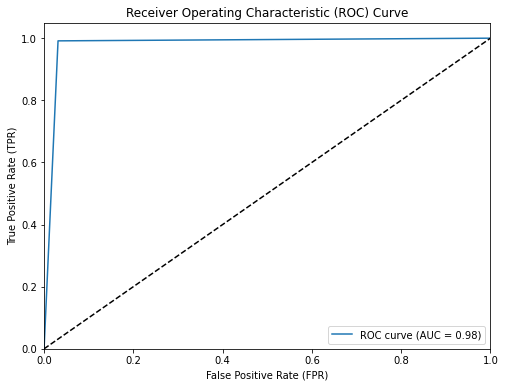

In [403]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your predicted probabilities in y_pred_prob and true labels in y_true

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [405]:
#Random forest
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9889479456677635


In [406]:
y_pred = rf_classifier.predict(X_test)

# Calculate the recall score of the model
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("f1 Score:", f1)


Recall Score: 0.9911408815903198
Precision Score: 0.9807568954457986
f1 Score: 0.9859215475550779


In [407]:
import pickle

In [408]:
pickle.dump(rf_classifier, open('model112.pkl', 'wb'))

In [409]:
pickle.dump(label_encoder, open('label_encoder_1.pkl', 'wb'))

In [419]:
pickle.dump(scaler,open('scaler.pkl', 'wb'))

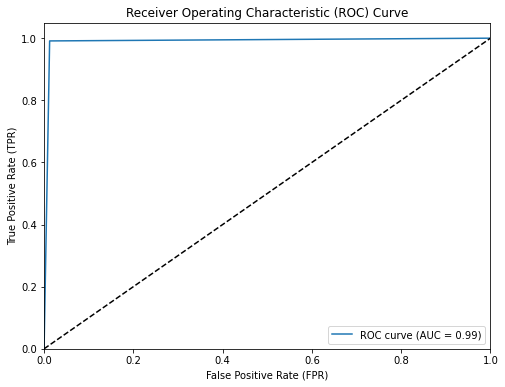

In [410]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your predicted probabilities in y_pred_prob and true labels in y_true

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBOOST

In [89]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [90]:
# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier(reg_lambda = 2)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8223234624145785


In [91]:
from sklearn.metrics import recall_score

# Assuming you have trained your model and obtained the predicted labels
y_pred = xgb_classifier.predict(X_test)

# Calculate the recall score of the model
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("f1 Score:", f1)



Recall Score: 0.6862575626620571
Precision Score: 0.829242819843342
f1 Score: 0.7510049657129344


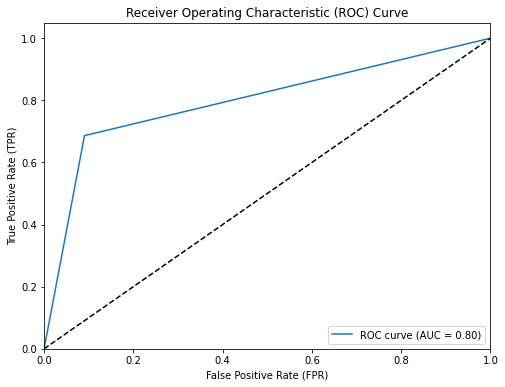

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your predicted probabilities in y_pred_prob and true labels in y_true

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Linear SVM

In [93]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


In [94]:
model = LinearSVC()
model.fit(X_train, y_train)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [95]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7091031806293765
Precision: 0.7204783258594918
Recall: 0.41659464131374246
F1 Score: 0.5279299014238774


In [75]:
y_pred = rf_classifier.predict(X_test)

# Calculate the recall score of the model
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("f1 Score:", f1)


Recall Score: 0.9917891097666378
Precision Score: 0.9786780383795309
f1 Score: 0.9851899549259497


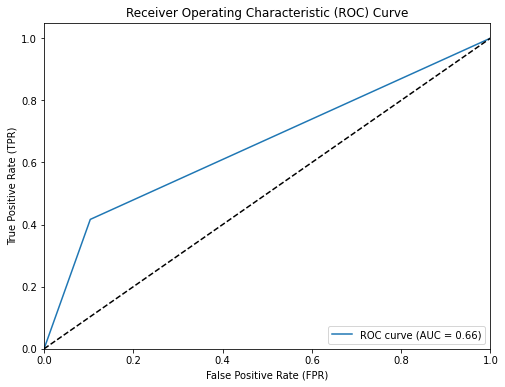

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your predicted probabilities in y_pred_prob and true labels in y_true

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pickle.dump(rf_classifier, open('model112.pkl', 'wb'))

In [ ]:
pickle.dump(label_encoder, open('label_encoder_1.pkl', 'wb'))

In [ ]:
pickle.dump(scaler,open('scaler.pkl', 'wb'))

In [ ]:
#Final model selected here is Random forest as it gave the best possible results